In [1]:
from lionagi.core.message import System, Instruction
from lionagi.core.execute.structure_executor import StructureExecutor
from lionagi.core.execute.instruction_map_executor import InstructionMapExecutor
from lionagi.core.agent.base_agent import BaseAgent

In [2]:
# let us use a simple calculator as an example
# in this example, we will have two sets of instructions with different step 1 but same step 2.
# given two numbers, the first step would be calculating both sum and diff in parallel
# and second step would be choosing between times or plus based on the sign of the first step

system = System(
    "You are asked to perform as a calculator. Return only a numeric value, i.e. int or float, no text."
)

instruct1 = Instruction(
    instruction={
        "sum the absolute values": "provided with 2 numbers, return the sum of their absolute values. i.e. |x|+|y|",
    }
)

instruct2 = Instruction(
    instruction={
        "diff the absolute values": "provided with 2 numbers, return the difference of absolute values. i.e. |x|-|y|",
    }
)

instruct3 = Instruction(
    instruction={
        "if previous response is positive": "times 2. i.e. *2",
        "else": "plus 2. i.e. +2",
    }
)

In [3]:
struct_multi = StructureExecutor()
struct_multi.add_node(system)
struct_multi.add_node(instruct1)
struct_multi.add_node(instruct2)
struct_multi.add_node(instruct3)

struct_multi.add_edge(system, instruct1)
struct_multi.add_edge(system, instruct2)
struct_multi.add_edge(instruct1, instruct3)
struct_multi.add_edge(instruct2, instruct3)

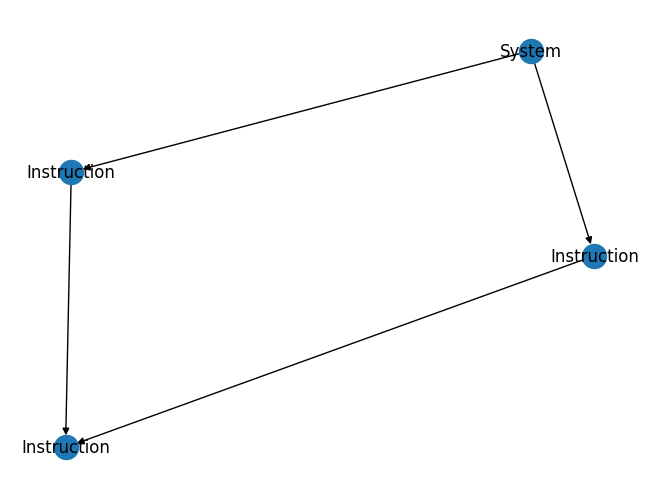

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

g = struct_multi.to_networkx()
labels = nx.get_node_attributes(g, "class_name")
nx.draw(g, labels=labels)

In [5]:
## output_parser parameter: agent self
## output_parser return: the expected result that should be returned after execution
def output_parser(agent):
    ## return all message dataframe in all branches
    output = []
    for branch in agent.executable.branches.values():
        output.append(branch.to_df())
    return output


executable = InstructionMapExecutor()

In [6]:
calculator = BaseAgent(
    structure=struct_multi, executable=executable, output_parser=output_parser
)

In [7]:
result = await calculator.execute(context={"x": 2, "y": 3})

------------------Welcome: system--------------------


system: You are asked to perform as a calculator. Return only a numeric value, i.e. int or float, no text.

user: {"sum the absolute values": "provided with 2 numbers, return the sum of their absolute values. i.e. |x|+|y|"}

user: {"diff the absolute values": "provided with 2 numbers, return the difference of absolute values. i.e. |x|-|y|"}

assistant 87945275385aed8a8d6f7e081ef13f5b: 5

-----------------------------------------------------


assistant ac362e72433e3b6b9c2ee48c9b83a8a4: 1

-----------------------------------------------------


user: {"if previous response is positive": "times 2. i.e. *2", "else": "plus 2. i.e. +2"}

user: {"if previous response is positive": "times 2. i.e. *2", "else": "plus 2. i.e. +2"}

assistant 87945275385aed8a8d6f7e081ef13f5b: 10

-----------------------------------------------------


assistant ac362e72433e3b6b9c2ee48c9b83a8a4: 2

-----------------------------------------------------


In [8]:
result[0]

,ln_id,message_type,timestamp,role,content,metadata,sender,recipient
0,06636421a6bf9508ae0b298d536c2cd6,System,2024-05-21T19:25:25.648920,system,{'system_info': 'You are asked to perform as a...,{'last_updated': {'recipient': '2024-05-21T19:...,system,87945275385aed8a8d6f7e081ef13f5b
1,60148a3608784c526a04ac7f4d48a380,Instruction,2024-05-21T19:25:26.767027,user,{'instruction': {'sum the absolute values': 'p...,{'last_updated': {'sender': '2024-05-21T19:25:...,user,87945275385aed8a8d6f7e081ef13f5b
2,80b03e5a133d1468176ce08b62604dbf,AssistantResponse,2024-05-21T19:25:27.347076,assistant,{'assistant_response': '5'},{'last_updated': {'sender': '2024-05-21T19:25:...,87945275385aed8a8d6f7e081ef13f5b,user
3,19286d507bf7fe7c468d9497492dab7a,Instruction,2024-05-21T19:25:27.902627,user,{'instruction': {'if previous response is posi...,{'last_updated': {'sender': '2024-05-21T19:25:...,user,87945275385aed8a8d6f7e081ef13f5b
4,09e61eadcf9da627e160a97ab29bc390,AssistantResponse,2024-05-21T19:25:28.285577,assistant,{'assistant_response': '10'},{'last_updated': {'sender': '2024-05-21T19:25:...,87945275385aed8a8d6f7e081ef13f5b,user


In [9]:
result[1]

,ln_id,message_type,timestamp,role,content,metadata,sender,recipient
0,38957e3c6a5d9a10e36a0ce9fc1aa0c0,System,2024-05-21T19:25:26.727694,system,{'system_info': 'You are asked to perform as a...,{'origin_ln_id': '06636421a6bf9508ae0b298d536c...,87945275385aed8a8d6f7e081ef13f5b,ac362e72433e3b6b9c2ee48c9b83a8a4
1,d0c54f4057b33a69698b6c524b090ee7,Instruction,2024-05-21T19:25:26.959627,user,{'instruction': {'diff the absolute values': '...,{'last_updated': {'sender': '2024-05-21T19:25:...,user,ac362e72433e3b6b9c2ee48c9b83a8a4
2,f866bcb87ac3b469de6abdeda3edfc63,AssistantResponse,2024-05-21T19:25:27.491691,assistant,{'assistant_response': '1'},{'last_updated': {'sender': '2024-05-21T19:25:...,ac362e72433e3b6b9c2ee48c9b83a8a4,user
3,6c327ff27baf2a87040bed31cd1ef7e2,Instruction,2024-05-21T19:25:27.903423,user,{'instruction': {'if previous response is posi...,{'last_updated': {'sender': '2024-05-21T19:25:...,user,ac362e72433e3b6b9c2ee48c9b83a8a4
4,17eca8376c3c33812070e0fffb484d66,AssistantResponse,2024-05-21T19:25:29.886516,assistant,{'assistant_response': '2'},{'last_updated': {'sender': '2024-05-21T19:25:...,ac362e72433e3b6b9c2ee48c9b83a8a4,user


# Storing Structures

We currently support the storage of structures in Excel and Neo4j, enabling their reuse in future applications.

### Excel

In [10]:
struct_multi.to_excel("math_multi")  # dir = "structure_storage" (default)

### Neo4j

In [11]:
# initiate Neo4j Driver
uri = "bolt://localhost:7687"
user = "neo4j"
password = "12345678"
database = "neo4j"

from lionagi.integrations.storage.neo4j import Neo4j

neo4j = Neo4j(uri, user, password, database)

In [12]:
# structure_name is unique

await neo4j.store(struct_multi, structure_name="math_multi")